#### Name: {Broker}, {Carl}
#### Assignment: {2}

### Instructions
For each assignment use the provided template.  Use proper markdown and coding syntax.  

If you have note used Jupyter Notebooks before, please review: https://realpython.com/jupyter-notebook-introduction/

Questions: Data Structures and Algorithms textbook - Questions: R2.4, R2.5, R2.9, P2.34.

R-2.4 Write a Python class, Flower, that has three instance variables of type str,
int, and float, that respectively represent the name of the flower, its number of petals, and its price. Your class must include a constructor method
that initializes each variable to an appropriate value, and your class should
include methods for setting the value of each type, and retrieving the value
of each type

In [1]:
class Flower:
    def __init__(self, name, petals, price):
        self._name = name
        self._petals = petals
        self._price = price
        
    def get_name(self):
        if isinstance(self._name, str):
            return '{}'.format(self._name)
        else:
            raise TypeError('The name of the flower is not in string format!')
    
    def get_petals(self):
        if isinstance(self._petals, int):
            return '{}'.format(self._petals)
        else:
            raise TypeError('The number of petals is not in an integer format!')
    
    def get_price(self):
        if isinstance(self._price, float):
            return '{}'.format(self._price)
        else:
            raise TypeError('The price of the flower is not a float format!')

In [2]:
#proof of functionality
flower = Flower('Rose', 5, 3.49)

print('flower:')
print(flower.get_name())
print(flower.get_petals())
print(flower.get_price())

flower:
Rose
5
3.49


In [3]:
#depiction of flower_name() TypeError() 'check'
flower_1 = Flower(2342, 5, 3.49)

print('flower_1:')
print(flower_1.get_name())
print(flower_1.get_petals())
print(flower_1.get_price())

flower_1:


TypeError: The name of the flower is not in string format!

In [4]:
#depiction of flower_petals() TypeError() 'check'
flower_2 = Flower('Rose', 'five', 3.49)

print('flower_2:')
print(flower_2.get_name())
print(flower_2.get_petals())
print(flower_2.get_price())

flower_2:
Rose


TypeError: The number of petals is not in an integer format!

In [5]:
#depiction of flower_price() TypeError() 'check'
flower_3 = Flower('Rose', 5, 3)

print('flower_3:')
print(flower_3.get_name())
print(flower_3.get_petals())
print(flower_3.get_price())

flower_3:
Rose
5


TypeError: The price of the flower is not a float format!

^The first time I've been happy to see errors. 

R-2.5 Use the techniques of Section 1.7 to revise the charge and make payment
methods of the CreditCard class to ensure that the caller sends a number
as a parameter

In [6]:
class CreditCard:#A consumer credit card.
    def __init__(self, customer, bank, acnt, limit):
        #Create a new credit card instance.

        #The initial balance is zero.
        
        #customer the name of the customer (e.g., 'John Bowman')
        #bank     the name of the bank (e.g., 'California Savings')
        #acnt     the acount identifier (e.g., '5391 0375 9387 5309')
        #limit    credit limit (measured in dollars)

        self._customer = customer
        self._bank = bank
        self._account = acnt
        self._limit = limit
        self._balance = 0
        
    def get_customer(self):
        #Return name of the customer.
        return self._customer

    def get_bank(self):
        #Return the bank s name.
        return self._bank

    def get_account(self):
        #Return the card identifying number (typically stored as a string).
        return self._account

    def get_limit(self):
        #Return current credit limit.
        return self._limit

    def get_balance(self):
        #Return current balance.
        return self._balance

    def charge(self, price):
        #Charge given price to the card, assuming sufficient credit limit.
        #Return True if caller supplied account number and charge was processed; False if charge was denied.
        
        if not isinstance(price, (int, float)):
            raise TypeError('price must be numeric') 
        if price + self._balance > self._limit:
            #if charge would exceed limit, cannot accept charge
            return False
        else:
            self._balance += price
            return True
        
    def make_payment(self, amount):
        #Process customer payment that reduces balance.
        if not isinstance(amount, (int, float)):
            raise TypeError('amount must be numeric')
        self._balance -= amount
        
if __name__ == '__main__':    
    wallet = []
    wallet.append(CreditCard('John Bowman', 'California Savings', '5391 0375 9387 5309', 2500))
    wallet.append(CreditCard('John Bowman', 'California Federal', '3485 0399 3395 1954', 3500))
    wallet.append(CreditCard('John Bowman', 'California Finance', '5391 0375 9387 5309', 5000))

    for val in range(1, 17):
        wallet[0].charge(val)
        wallet[1].charge(2*val)
        wallet[2].charge(3*val)

    for c in range(3):
        print('Customer =', wallet[c].get_customer())
        print('Bank =', wallet[c].get_bank())
        print('Account =', wallet[c].get_account())
        print('Limit =', wallet[c].get_limit())
        print('Balance =', wallet[c].get_balance())
        while wallet[c].get_balance() > 100:
            wallet[c].make_payment(100)
            print('New balance =', wallet[c].get_balance())
        print()

Customer = John Bowman
Bank = California Savings
Account = 5391 0375 9387 5309
Limit = 2500
Balance = 136
New balance = 36

Customer = John Bowman
Bank = California Federal
Account = 3485 0399 3395 1954
Limit = 3500
Balance = 272
New balance = 172
New balance = 72

Customer = John Bowman
Bank = California Finance
Account = 5391 0375 9387 5309
Limit = 5000
Balance = 408
New balance = 308
New balance = 208
New balance = 108
New balance = 8



R-2.9 Implement the sub method for the Vector class of Section 2.3.3, so
that the expression u−v returns a new vector instance representing the
difference between two vectors.

In [7]:
class Vector:
#Represent a vector in a multidimensional space.

    def __init__ (self, d):
    #Create d-dimensional vector of zeros.
        self._coords = [0]*d

    def __len__ (self):
    #Return the dimension of the vector.
        return len(self._coords)

    def __getitem__ (self, j):
    #Return jth coordinate of vector.
        return self._coords[j]

    def __setitem__ (self, j, val):
    #Set jth coordinate of vector to given value.
        self._coords[j] = val

    def __add__ (self, other):
    #Return sum of two vectors.
        if len(self) != len(other): # relies on len method
            raise ValueError('dimensions must agree')
        result = Vector(len(self)) # start with vector of zeros
        for j in range(len(self)):
            result[j] = self[j] + other[j]
        return result
    
    def __sub__(self, other):
    #Return difference of two vectors.
        if len(self) != len(other): # relies on len method
            raise ValueError('dimensions must agree')
        result = Vector(len(self))  # start with vector of zeros
        for j in range(len(self)):
            result[j] = self[j] - other[j]
        return result

    def __eq__ (self, other):
    #Return True if vector has same coordinates as other.
        return self._coords == other._coords

    def __ne__ (self, other):
    #Return True if vector differs from other.
        return not self == other # rely on existing eq definition

    def __str__ (self):
    #Produce string representation of vector.
        return '<' + str(self._coords)[1:-1] + '>' # adapt list representation

P-2.34 Write a Python program that inputs a document and then outputs a barchart plot of the frequencies of each alphabet character that appears in
that document.

In [8]:
import matplotlib.pyplot as plt

with open("Book 1 - The Philosopher's Stone.txt", encoding="utf8") as f: 
    lines = f.readlines()

statistics={}

for line in lines:
    for char in line.rstrip():
        if char in statistics:
            statistics[char]+=1
        else:
            statistics[char]=1
 
index = list(statistics.keys())
value = list(statistics.values())

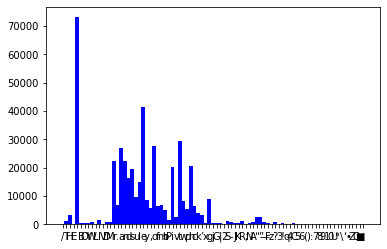

In [9]:
plt.bar(index, value, width=1, color='b')
plt.show()

In [10]:
statistics

{'/': 6,
 'T': 1034,
 'H': 3372,
 'E': 240,
 ' ': 73044,
 'B': 350,
 'O': 324,
 'Y': 319,
 'W': 651,
 'L': 207,
 'I': 1398,
 'V': 191,
 'D': 687,
 'M': 665,
 'r': 22387,
 '.': 6849,
 'a': 26918,
 'n': 22375,
 'd': 16279,
 's': 19558,
 'u': 9563,
 'l': 15082,
 'e': 41351,
 'y': 8644,
 ',': 5658,
 'o': 27552,
 'f': 6429,
 'm': 6733,
 'b': 4977,
 'P': 1657,
 'i': 20094,
 'v': 2715,
 't': 29335,
 'w': 8091,
 'p': 5257,
 'h': 20532,
 'c': 6372,
 'k': 3940,
 '’': 3111,
 'x': 380,
 'g': 8820,
 'j': 315,
 'G': 491,
 '|': 347,
 '2': 178,
 'S': 1184,
 '-': 705,
 'J': 408,
 'K': 426,
 'R': 989,
 ';': 133,
 'N': 471,
 'A': 687,
 '“': 2437,
 '”': 2414,
 '—': 885,
 'F': 419,
 'z': 259,
 '?': 763,
 '3': 131,
 '!': 450,
 'q': 219,
 '4': 80,
 'C': 307,
 '5': 67,
 '6': 66,
 '(': 30,
 ')': 31,
 ':': 69,
 '7': 70,
 '8': 66,
 '9': 68,
 '1': 199,
 '0': 67,
 'U': 190,
 '"': 9,
 '\\': 19,
 '‘': 15,
 '•': 3,
 'Z': 6,
 'Q': 203,
 '■': 1,
 "'": 1}

End of notebook. -CJB 9/15/19